# Shopee Code League - Marketing Analytics
Email campaign analyis

<a id='intro'></a>
## 1 Introduction

> The aim of this project is to build a model that can predict whether a user opens the emails sent by Shopee.   
> **Task**   
> Data related to marketing emails that were sent to Shopee users over a certain period. It contains information about:
> - User-specific information
> - Email nature
>- User's reaction to the email, including whether users opened the email    
Based on the data provided, you must predict wheter each user will open an email sent to him/ her.
>
> **Questions:** 
> - Is specific user demographics (country, age) prompt to open email?
> - What user behavior prompt to has higher open email rate (frequency of open email, check-in, purchase)
> - Typically, ratio of logout/login, and any correlation with opening the email?
> - Is sending email increase the chance of user login + checout? behavior (checkin to checkout date, open email before or after)?
> - any impact on the subject line length


[kaggle link](https://www.kaggle.com/c/open-shopee-code-league-marketing-analytics/data)

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id='wrangling'></a>
## 2 Data Wrangling

> Data was loaded and inspected, check for data type, missing values, ambiguity data, and then trim, clean, engineer th

### 2.1 General properties

In [2]:
# train dataset
df = pd.read_csv('./data/train.csv')

# test dataset
test = pd.read_csv('./data/test.csv')
df.head()

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4


### Data dictionary   
|**No**| **Colume's name** |**Descriptions**|
|:----:|:------------------|:---------------|
|01|country_code|An integer code for the country where the user lives.|
|02|grass_date|The date when the email was sent.|
|03|user_id|the unique identifier of each user.|
|04|subject_line_length|the number of characters in the subject of the email|
|05|last_open_day|How many days ago was the last time the user opened an email|
|06|last_login_day|How many days ago the user last logged in its Shopee account|
|07|last_checkout_day|How many days ago the user last purchased on Shopee|
|08|open_count_last_N_days|the total number of email opens in the last N days. N=10,30,60|
|09|login_count_last_N_days|the total number of user logins in the last N days. N=10,30,60|
|10|checkout_count_last_N_days|the total number of checkouts (=purchases) by the user in the last N days. N=10,30,60|
|11|open_flag|the target variable. Whether or not the email was opened.|

In [3]:
# user dataset
# empty values are simply unknown
user = pd.read_csv('./data/users.csv')
user.head()

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com


### Data dictionary   
|**No**| **Colume's name** |**Descriptions**|
|:----:|:------------------|:---------------|
|01|user_id|the unique identifier of each user|
|02|attr_[1/2/3]|general user attributes. Attr_1 and attr_2 are boolean, attrib_3 can be integer [0,1,2,3,4]|
|03|age|The user's reported age.|
|04|domain|The user's top-level email domain. Less common domains are bundled together under the label 'other'.|

In [4]:
# no missing value, but there are datatype need to be corrected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 73539 non-null  int64 
 1   grass_date                   73539 non-null  object
 2   user_id                      73539 non-null  int64 
 3   subject_line_length          73539 non-null  int64 
 4   last_open_day                73539 non-null  object
 5   last_login_day               73539 non-null  object
 6   last_checkout_day            73539 non-null  object
 7   open_count_last_10_days      73539 non-null  int64 
 8   open_count_last_30_days      73539 non-null  int64 
 9   open_count_last_60_days      73539 non-null  int64 
 10  login_count_last_10_days     73539 non-null  int64 
 11  login_count_last_30_days     73539 non-null  int64 
 12  login_count_last_60_days     73539 non-null  int64 
 13  checkout_count_last_10_days  73

In [5]:
# no missing value in test dataset as well
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55970 entries, 0 to 55969
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 55970 non-null  int64 
 1   grass_date                   55970 non-null  object
 2   user_id                      55970 non-null  int64 
 3   subject_line_length          55970 non-null  int64 
 4   last_open_day                55970 non-null  object
 5   last_login_day               55970 non-null  object
 6   last_checkout_day            55970 non-null  object
 7   open_count_last_10_days      55970 non-null  int64 
 8   open_count_last_30_days      55970 non-null  int64 
 9   open_count_last_60_days      55970 non-null  int64 
 10  login_count_last_10_days     55970 non-null  int64 
 11  login_count_last_30_days     55970 non-null  int64 
 12  login_count_last_60_days     55970 non-null  int64 
 13  checkout_count_last_10_days  55

In [6]:
# only user_id & attr_3 have no missing values
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127886 entries, 0 to 127885
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  127886 non-null  int64  
 1   attr_1   78987 non-null   float64
 2   attr_2   127439 non-null  float64
 3   attr_3   127886 non-null  float64
 4   age      78987 non-null   float64
 5   domain   127886 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


In [7]:
# number of unique user in train data
print(f"For total of {df.shape[0]} rows, there are {df.user_id.nunique()} unique user.")

# how many repeated user id
print(f"Total number of unique user receiving more than 1 email: {sum(df.user_id.duplicated())} ")

For total of 73539 rows, there are 72845 unique user.
Total number of unique user receiving more than 1 email: 694 


In [8]:
df.loc[df.user_id.duplicated()]

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
2669,5,2019-07-17 00:00:00+08:00,19732,33,5,2,2,0,0,0,9,28,69,3,5,14,0,2669
3809,1,2019-07-18 00:00:00+08:00,6143,50,84,13,1169,0,0,0,0,2,2,0,0,0,0,3809
4683,1,2019-07-19 00:00:00+08:00,4717,35,23,8,63,0,1,1,1,8,57,0,0,0,0,4683
5253,4,2019-07-19 00:00:00+08:00,52605,46,29,11,21,0,1,1,0,3,8,0,1,1,0,5253
6344,3,2019-07-20 00:00:00+08:00,39696,44,4,1,52,10,20,20,7,20,46,2,2,6,1,6344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72956,1,2019-09-02 00:00:00+08:00,110311,43,16,11,44,0,1,3,13,20,50,0,0,1,0,72956
73055,2,2019-09-02 00:00:00+08:00,114052,38,39,8,27,0,0,5,1,26,60,0,1,4,0,73055
73106,1,2019-09-02 00:00:00+08:00,116635,33,25,12,Never checkout,0,1,2,1,4,7,0,0,0,0,73106
73156,3,2019-09-02 00:00:00+08:00,118490,49,6,38,Never checkout,0,1,1,0,0,3,0,0,0,0,73156


In [9]:
# peak on one of the repeated user (i.e user that receiving more than 1 email)
df.query('user_id == 116635')

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
53293,1,2019-08-20 00:00:00+08:00,116635,68,12,10,Never checkout,0,2,2,1,3,4,0,0,0,0,53293
73106,1,2019-09-02 00:00:00+08:00,116635,33,25,12,Never checkout,0,1,2,1,4,7,0,0,0,0,73106


### 2.2 Data manupulation
Change the data types, add column with engineered data

In [10]:
# convert the `grass_date` to datetime datatype, exclude timespan as all of them is fixed value
df['grass_date'] = pd.to_datetime(df.grass_date).dt.date
test['grass_date'] = pd.to_datetime(test.grass_date).dt.date

# add column to indicate the day of the week the email send out
# using .isoweekday(), where Monday = 1, Sunday = 7
df['email_weekday'] = df.grass_date.apply(lambda x:x.isoweekday())
test['email_weekday'] = test.grass_date.apply(lambda x:x.isoweekday())

columns `last_open_day`, `last_login_day`, `last_checkout_day` are with str datatype. This is due to there are str in these columns ('Never open', 'Never login', 'Never checkout').
To replace these str with '9999' and convert the datatype to numeric ('int32')

In [16]:
# replace str to '18999'. max value seens around 181xx
df = df.replace(to_replace=['Never open', 'Never login', 'Never checkout'], value='18999')
test = test.replace(to_replace = ['Never open', 'Never login', 'Never checkout'], value = '18999')

# convert str to numeric datatype
df = df.astype({'last_open_day':'int32', 'last_login_day':'int32', 'last_checkout_day':'int32'})
test = test.astype({'last_open_day':'int32', 'last_login_day':'int32', 'last_checkout_day':'int32'})


In [17]:
# merge df with user age
df = df.merge(user[['user_id','age']], how = 'left', on = 'user_id')

In [18]:
# convert 'country_code', 'user_id' to 'str' datatype as it does not carry any numeric meaning
df = df.astype({'country_code':'str', 'user_id': 'str'})
test = test.astype({'country_code':'str', 'user_id': 'str'})

In [19]:
# drop 'row_id' as this is just a record with no additional information provided
df.drop('row_id', axis = 1, inplace = True)

In [20]:
# export to csv
df.to_csv('./data/train_cleaned.csv', index = False)
test.to_csv('./data/test_cleaned.csv', index = False)

### 2.3 Statistical summary
### 2.3.1 Numeric column  
- `last_login_day` with max at 18141 days, translated to about 50 years ago, which is not logic. To examine further the data in next section (data cleaning).
- `open_flag`, average at 0.155781, i.e. 15.58% user open email, and majority is not.
- `age`, mean age at 31.4,  but with unrealistic min & max age (-17, 118, respectively).

In [21]:
df.describe()

,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,email_weekday,age
count,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,45347.000000
mean,43.656373,1971.700499,125.213751,4424.168768,0.911829,2.780457,5.019364,8.382287,25.284053,49.010430,0.909898,2.796040,5.420960,0.155781,3.618597,31.445564
std,11.219323,5746.148019,1214.642727,7963.786759,1.754052,4.570239,7.902313,13.424436,37.853189,71.819327,2.887416,7.686064,13.980182,0.362650,2.032295,11.797405
min,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-17.000000
25%,34.000000,6.000000,3.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,24.000000
50%,43.000000,18.000000,8.000000,44.000000,0.000000,1.000000,2.000000,3.000000,11.000000,22.000000,0.000000,0.000000,1.000000,0.000000,4.000000,29.000000
75%,52.000000,56.000000,27.000000,456.000000,1.000000,3.000000,6.000000,12.000000,35.000000,69.000000,1.000000,3.000000,6.000000,0.000000,5.000000,36.000000
max,75.000000,18999.000000,18999.000000,18999.000000,31.000000,92.000000,135.000000,254.000000,735.000000,1260.000000,157.000000,531.000000,783.000000,1.000000,7.000000,118.000000


### 2.3.2 obj column  
- User from 7 different country code, with majority user from country code = 1
- The dataset comprises of email send out in 47 different date in 1.5 months (16 July - 2nd Sept, 2019)
- Total 74864 unique user received email within the 1.5 months time span. Majority user receiving 1 email and one user receiving up to 3 emails.

In [23]:
df.describe(include=[np.object])

,country_code,grass_date,user_id
count,73539,73539,73539
unique,7,47,72845
top,1,2019-09-02,74864
freq,28423,3915,3


In [24]:
# earliest email date:
df.grass_date.min()

datetime.date(2019, 7, 16)

In [25]:
# latest email date:
df.grass_date.max()

datetime.date(2019, 9, 2)

In [27]:
# earliest email date from test dataset is a day after the latest date in train dataset
test.grass_date.min()

datetime.date(2019, 9, 3)

### 2.4 Data Cleaning 

#### 2.4.1 `last_login_day`

In [29]:
print(f" Total of {len(df.query('last_login_day > 9999'))} rows last login day of >18000 days, translated to > 50 years ago")
df.query('last_login_day > 9999')


 Total of 303 rows last login day of >18000 days, translated to > 50 years ago


,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,email_weekday,age
1739,2,2019-07-16,90499,46,18999,18999,18999,0,0,2,0,0,0,0,0,0,0,2,NaN
6049,4,2019-07-19,111486,46,2,18096,18999,1,1,1,0,0,1,0,0,0,1,5,NaN
7022,1,2019-07-21,18952,40,18999,18999,66,0,0,0,37,92,122,0,0,0,0,7,NaN
11759,3,2019-07-23,104975,47,18999,18999,18999,0,0,0,0,0,2,0,0,0,1,2,20.0
12159,1,2019-07-23,127462,57,18999,18999,18999,0,1,2,0,0,0,0,0,0,0,2,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67568,1,2019-09-01,43929,40,18999,18999,9,0,0,0,2,2,3,1,1,1,0,7,NaN
68887,3,2019-09-01,103603,32,25,18140,18999,0,0,1,0,0,0,0,0,0,0,7,NaN
70360,5,2019-09-02,17748,23,18999,18141,101,0,0,0,0,0,0,0,0,0,0,1,NaN
71812,3,2019-09-02,68171,49,18999,18999,18999,8,23,35,0,0,0,0,0,0,1,1,32.0


In [23]:
# drop rows with unrealistic long last login day ( > 50 years)
#df = df.query('last_login_day <= 9999')

In [30]:
len(test.query('last_login_day > 9999'))

180

#### 2.4.2 `age`
- This is user reported age, which may not be the true age.
- There are 2 with negative age, which is impossible.
- There are 314 with age exceeding 100 years old.
- 38.32% user not disclose their age.

Thus, info from this column is treated as for information only, as it might not be the true age and there are ~ 38% user not reporting their age as well.

In [31]:
print(f"Age column has {df['age'].isnull().sum()} missing value out of {df.shape[0]}")
print(f"which is approximately {round(100*df['age'].isnull().sum()/df.shape[0],2)}% of the dataset")

Age column has 28192 missing value out of 73539
which is approximately 38.34% of the dataset


In [32]:
# Two users with negative age, which is impossible
df.query('age < 0')

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,email_weekday,age
55774,3,2019-08-22,86151,52,37,128,259,0,0,0,0,0,0,0,0,0,0,4,-17.0
59683,5,2019-08-26,1973,31,30,2,2,0,0,7,8,25,28,1,4,5,0,1,-16.0


In [33]:
# 314 users age exceeding 100 yo, which is ambiguity
df.query('age > 100')

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,email_weekday,age
395,4,2019-07-16,23206,44,10,2,2,1,1,2,25,69,163,4,8,16,0,2,118.0
639,4,2019-07-16,36248,44,9,2,13,1,1,2,3,10,11,1,2,2,1,2,118.0
677,4,2019-07-16,38235,44,12,6,42,0,3,3,1,5,36,0,0,4,0,2,118.0
862,4,2019-07-16,47984,44,12,1,128,0,2,2,2,5,12,0,0,0,1,2,118.0
896,4,2019-07-16,49721,44,7,12,15,1,1,1,1,12,21,0,4,4,0,2,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71126,3,2019-09-02,44189,64,12,3,3,0,1,5,11,49,121,2,4,9,0,1,118.0
71586,3,2019-09-02,60237,49,10,2,54,1,6,8,3,6,24,0,0,1,0,1,110.0
71868,4,2019-09-02,70127,34,42,7,37,0,0,0,4,20,56,0,0,3,0,1,118.0
72049,4,2019-09-02,78293,34,66,69,90,0,0,0,0,0,0,0,0,0,0,1,118.0


In [34]:
# replace negative age with nan
df['age'] = df['age'].replace(to_replace=[-16,-17], value=np.nan)

<a id='eda'></a>
## 3 Exploratory Data Analysis

### 3.1 Dependent variable, `open_flag`   
- **15.58%** (11451 out of 73515) open their email from Shopee.

In [35]:
print("Email open or not:")
print(df['open_flag'].value_counts())
print()
print("In percentage:")
print(100*df['open_flag'].value_counts(normalize=True))

Email open or not:
0    62083
1    11456
Name: open_flag, dtype: int64

In percentage:
0    84.421871
1    15.578129
Name: open_flag, dtype: float64


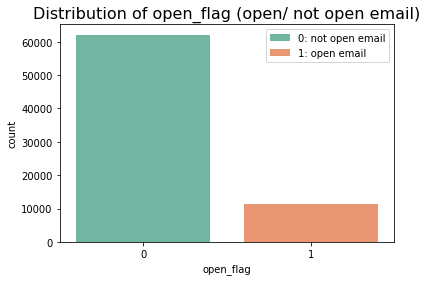

In [36]:
# Visualise open_flag in bar plot
plt.subplots(figsize=(6,4))
ax = sns.countplot(x='open_flag', data = df, palette = "Set2")

ax.legend(ax.patches, ["0: not open email", "1: open email"])
ax.set_title("Distribution of open_flag (open/ not open email)", fontsize=16);

### 3.2 Is specific user demographics (country, age) prompt to open email?

In [37]:
# find out the 
df.groupby('country_code')['open_flag'].value_counts(normalize = True)

country_code  open_flag
1             0            0.918904
              1            0.081096
2             0            0.808851
              1            0.191149
3             0            0.868617
              1            0.131383
4             0            0.650587
              1            0.349413
5             0            0.784682
              1            0.215318
6             0            0.778019
              1            0.221981
7             0            0.755774
              1            0.244226
Name: open_flag, dtype: float64

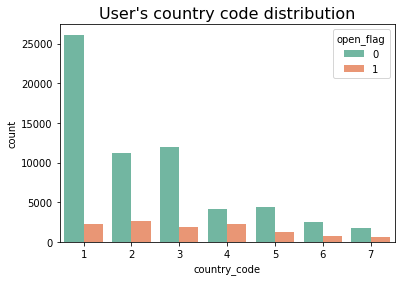

In [38]:
# Visualise the distribution of user's country_code
ax = sns.countplot(x = 'country_code', hue = 'open_flag', data = df, palette = "Set2")
ax.set_title("User's country code distribution", fontsize=16);

In [39]:
def cat_plot(x, y, df, title):
    """
    This is using seaborn catplot
    Input: x = data for x- axis, y = data for y-axis, dataframe, and the title
    """
    ax = sns.catplot(x = x, y = y, data = df, palette = "Set2", kind = "violin",
                     height = 5, aspect = 1.4)
    
    ax.fig.subplots_adjust(top = .9)
    ax.fig.suptitle(title, fontsize =16)

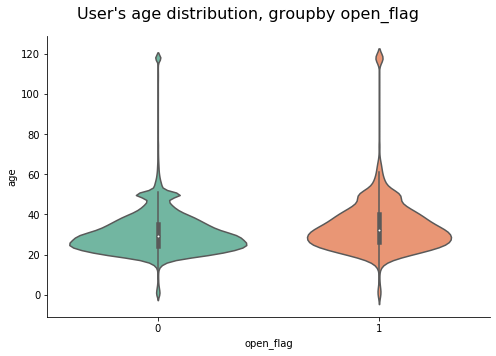

In [40]:
cat_plot('open_flag', 'age', df, "User's age distribution, groupby open_flag")

### 3.3 Any impact by the subject line length?
- No obvious differences in the subject line length distribution grouby `open-flag`.

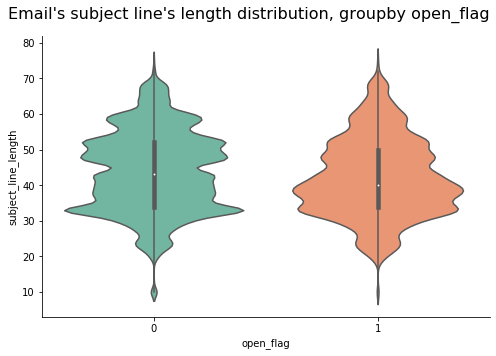

In [41]:
cat_plot('open_flag', 'subject_line_length', df, 
         "Email's subject line's length distribution, groupby open_flag")

### 3.4 Any specific user behavior that prompt to higher possibility of opening email?
- frequency of opening email in last 10/30/60 days. 
- frequency of login in last 10/30/60 days.
- frequency of checkout in last 10/30/60 days

**High positive correlation** for open, login & checkout counts at different past days (10, 30, 60). Which make sense.   
**Positive correlation** between `open_count_last_N_days` and `open_flag`. Slightly stronger correlation for **smaller** N, i.e. 10 days.   
**Positive correlation** between `login_count_last_N_days` and `checkout_count_last_N_days`, with slightly stronger correlation for **larger** N, i.e. 60 days.
**Weak relationship** between `login_count_last_N_days` and `checkout_count_last_N_days` with `open_flag`. Which means, higher login frequency, higher checkout does not impact much by opening the marketing email.

In [42]:
# columns to calculate the correlation
cols = ['open_count_last_10_days', 'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days', 'login_count_last_60_days',
       'checkout_count_last_10_days', 'checkout_count_last_30_days', 'checkout_count_last_60_days',
       'open_flag']
corr = df[cols].corr()


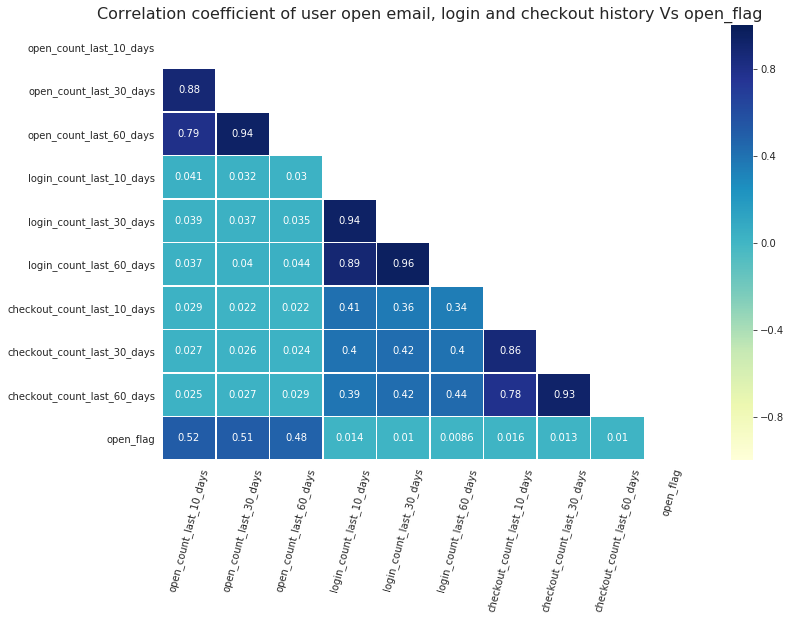

In [43]:
# Visualise correlation via heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12,8))
    ax = sns.heatmap(corr, mask = mask, vmax = 1, vmin=-1, annot = True,
                     linewidths=.5, cmap = "YlGnBu")
    ax.set_title("Correlation coefficient of user open email, login and checkout history Vs open_flag", fontsize=16)
    plt.xticks(rotation = 75)

User that **does not open email, or lower email opening frequency** in the past, tends **NOT open** the email send by Shopee

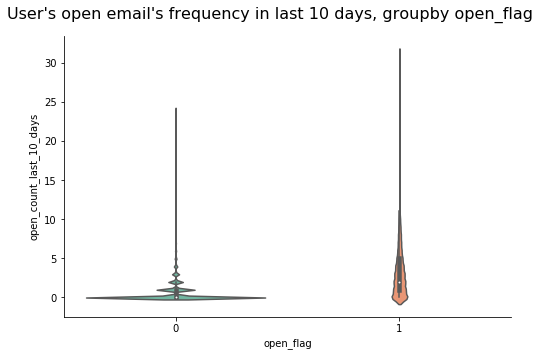

In [44]:
# Visualise user open count in last 10 days groupby open_flag
cat_plot('open_flag', 'open_count_last_10_days', df, 
         "User's open email's frequency in last 10 days, groupby open_flag")

User with **very high login's frequency**, tends NOT open email from shopee

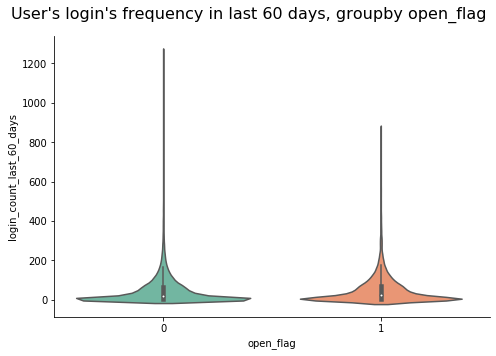

In [45]:
# Visualise user login count in last 60 days groupby open_flag
cat_plot('open_flag', 'login_count_last_60_days', df, 
         "User's login's frequency in last 60 days, groupby open_flag")

User with **very high checkout's frequency**, tends NOT open email from shopee

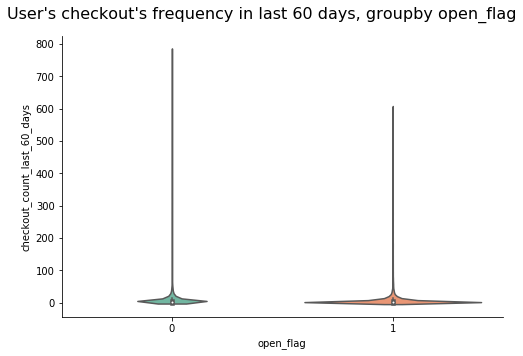

In [46]:
# Visualise user login count in last 60 days groupby open_flag
cat_plot('open_flag', 'checkout_count_last_60_days', df, 
         "User's checkout's frequency in last 60 days, groupby open_flag")

In [47]:
df.query('open_flag == 1')['login_count_last_60_days'].describe()

count    11456.000000
mean        50.453736
std         68.952705
min          0.000000
25%          4.000000
50%         25.000000
75%         73.000000
max        863.000000
Name: login_count_last_60_days, dtype: float64

In [48]:
df.query('open_flag == 0')['login_count_last_60_days'].describe()

count    62083.000000
mean        48.744101
std         72.333273
min          0.000000
25%          3.000000
50%         22.000000
75%         68.000000
max       1260.000000
Name: login_count_last_60_days, dtype: float64

# 4 Model Preprocessing

In [49]:
# Scikit learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier

# xgboost
from xgboost import XGBClassifier
from xgboost import plot_tree, plot_importance

In [50]:
# Select cols for feature X (independent variables)
# exclude those feature X that highly correlated (e.g. only select open_count_last_10_days)
# exclude for 30/60 days. Similarly for login & checkout count

cols = ['country_code','subject_line_length',
       'last_open_day', 'last_login_day', 'last_checkout_day',
       'open_count_last_10_days', 'login_count_last_60_days',
       'checkout_count_last_60_days','email_weekday']

dfx = df[cols]  
test_x = test[cols]

In [51]:
# Total of 9 features (incl. 1 nominal categorical feature, i.e. the country_code)
print(f"shape for train dataset, dfx : {dfx.shape}")
print(f"shape for test dataset, test_x : {test_x.shape}")

shape for train dataset, dfx : (73539, 9)
shape for test dataset, test_x : (55970, 9)


In [53]:
# Create X-features and y label
X = dfx
y = df['open_flag']

Xtest = test_x  #test dataset

### Train test split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True,
                                                   stratify = y, random_state = 42)

In [57]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (58831, 9), y_train: (58831,)
X_test: (14708, 9), y_test: (14708,)


### Preprocessing pipelines

In [58]:
# Numeric features, to perform scalling
numeric_X = cols[1:]

numeric_transform = Pipeline(steps = [
                    ('scaler', StandardScaler())
                    ])

In [59]:
# Nominal categorical features to OneHotEncode
categorical_X = ['country_code']

categorical_transform = Pipeline(steps = [
                    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
                    ])

In [60]:
# Perform preprocessing for boht numeric and categorical features
preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transform, numeric_X),
                    ('cat', categorical_transform, categorical_X)
                ])

### Compute class weight

In [79]:
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

print(f"class weights: {class_weights}")
print(f"class        : {np.unique(y_train)}")

class weights: [0.59226634 3.20954719]
class        : [0 1]


In [80]:
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

## 5 Modelling

## 5.1 Baseline Accuracy
The naive baseline accuracy for this dataset is **84.4%**, that is the null model predicting the majority class of `open_flag` = 0.

In [61]:
df['open_flag'].value_counts(normalize = True)

0    0.844219
1    0.155781
Name: open_flag, dtype: float64

## 5.2 Logistic Regression

In [62]:
lr = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver = 'lbfgs'))
    ])

In [63]:
lr_params = {'classifier__C': np.logspace(-5,1,20),
             'classifier__class_weight': ['balanced', None]}

In [64]:
rs_lr = RandomizedSearchCV(estimator=lr,
                           param_distributions=lr_params,
                           n_jobs=-1, cv=3, verbose =2)

rs_lr.fit(X_train, y_train)

print(f"best score: {rs_lr.best_score_}")
print(f"best estimator: {rs_lr.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.5s finished


best score: 0.8820859750811647
best estimator: {'classifier__class_weight': None, 'classifier__C': 0.26366508987303555}


In [65]:
# Function to print out the results

def print_results(model):
    
    """
    Input: model -> model used in RandomizeSearchCV
    
    This function prints the best hyperparameters resulted from the model that was fitted with X_train, y_train data
    It also prints the accuracy score for X_train and X_test data resulted from the best params
    Lastly, it prints the classification report
    It returns the X_train, X_test accuracy score, ypred from X_test, and confusion matrix
    """
    
    train_sc = model.score(X_train, y_train)
    test_sc = model.score(X_test, y_test)
    ypred = model.predict(X_test)
    cm = confusion_matrix(y_test, ypred)
    report = classification_report(y_test, ypred)
    
    print(f"best estimator: {model.best_params_}")
    print()
    print(f"train accuracy: {round(train_sc,4)}")
    print(f"test accuracy: {round(test_sc, 4)}")
    print()
    print("Classification report:")
    print(report)
    
    return train_sc, test_sc, ypred, cm

In [66]:
# print out the LogisticRegression results
lr_train, lr_test, lr_ypred, lr_cm = print_results(rs_lr)

best estimator: {'classifier__class_weight': None, 'classifier__C': 0.26366508987303555}

train accuracy: 0.882
test accuracy: 0.882

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     12417
           1       0.71      0.41      0.52      2291

    accuracy                           0.88     14708
   macro avg       0.81      0.69      0.73     14708
weighted avg       0.87      0.88      0.87     14708



In [68]:
pd.DataFrame(lr_cm, columns = ['Predict 0', 'Predict 1'],
             index = ['Actual 0', 'Actual 1'])

,Predict 0,Predict 1
Actual 0,12039,378
Actual 1,1357,934


In [69]:
roc_auc_score(y_test, lr_ypred)

0.6886200495251807

In [70]:
rs_lr.best_estimator_[1].coef_[0]

array([-0.02782908, -0.08895345,  0.04062562,  0.05101183,  1.20601007,
       -0.03546777,  0.00654565, -0.07841517, -0.803158  , -0.27374207,
       -0.85641565,  0.94192927,  0.42046167, -0.10487462,  0.67149763])

## 5.3 Random Forest

In [73]:
rf = Pipeline(steps = [
        ('preprecessor', preprocessor),
        ('classifier', RandomForestClassifier())
])

In [71]:
rf_params = {'classifier__n_estimators': [140, 145, 150, 155], #number of trees def=100
             'classifier__max_depth': [25, 26, 27, 28, 29],
             'classifier__min_samples_split': [2,3,4],
             'classifier__min_samples_leaf': [3,4,5,6],
             'classifier__class_weight': ['balanced_subsample', None]
            }

In [74]:
rs_rf = RandomizedSearchCV(estimator=rf,
                           param_distributions=rf_params,
                           n_jobs=-1, cv=3, verbose =2)

rs_rf.fit(X_train, y_train)

print(f"best score: {rs_rf.best_score_}")
print(f"best estimator: {rs_rf.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.1min finished


best score: 0.8839727354625962
best estimator: {'classifier__n_estimators': 150, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 5, 'classifier__max_depth': 29, 'classifier__class_weight': None}


In [75]:
# print out the LogisticRegression results
rf_train, rf_test, rf_ypred, rf_cm = print_results(rs_rf)

best estimator: {'classifier__n_estimators': 150, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 5, 'classifier__max_depth': 29, 'classifier__class_weight': None}

train accuracy: 0.9128
test accuracy: 0.8873

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     12417
           1       0.72      0.45      0.56      2291

    accuracy                           0.89     14708
   macro avg       0.81      0.71      0.75     14708
weighted avg       0.88      0.89      0.88     14708



In [76]:
# Confusion matrix
pd.DataFrame(lr_cm, columns = ['Predict 0', 'Predict 1'],
             index = ['Actual 0', 'Actual 1'])

,Predict 0,Predict 1
Actual 0,12039,378
Actual 1,1357,934


In [77]:
roc_auc_score(y_test, rf_ypred)

0.7099146539042815

In [ ]:
#TOP features in randomforest
rs_rf.feature_importances_
X_train.columns

In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance'])

top_feature = feature_importances.sort_values('importance', ascending=False)

In [ ]:
#Top 20 features
fig = top_feature.iloc[:20]
fig.plot(kind='barh', figsize=(10,9));


## 5.3 SVM (Support Vector Machine)

In [125]:
svm = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('classifier', SVC())
        ])

In [126]:
svm_params = {'classifier__C': np.logspace(-5,1,10),
              'classifier__kernel': ['linear', 'rbf'],
              'classifier__gamma': ['scale', 'auto'],
                }

In [127]:
rs_svm = RandomizedSearchCV(estimator=svm,
                           param_distributions=svm_params,
                           n_jobs=-1, cv=3, verbose =2)

rs_svm.fit(X_train, y_train)

print(f"best score: {rs_svm.best_score_}")
print(f"best estimator: {rs_svm.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.0min finished


best score: 0.8783804456833982
best estimator: {'classifier__kernel': 'rbf', 'classifier__gamma': 'scale', 'classifier__C': 0.1}


In [128]:
# print out the LogisticRegression results
svm_train, svm_test, svm_ypred, svm_cm = print_results(rs_svm)

best estimator: {'classifier__kernel': 'rbf', 'classifier__gamma': 'scale', 'classifier__C': 0.1}

train accuracy: 0.8805
test accuracy: 0.8815

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     12417
           1       0.74      0.37      0.49      2291

    accuracy                           0.88     14708
   macro avg       0.82      0.67      0.71     14708
weighted avg       0.87      0.88      0.86     14708



In [129]:
pd.DataFrame(svm_cm, columns = ['Predict 0', 'Predict 1'], 
             index = ['Actual 0', 'Actual 1'])

,Predict 0,Predict 1
Actual 0,12124,293
Actual 1,1450,841


In [130]:
roc_auc_score(y_test, svm_ypred)

0.6717459628133337

## 5.4 Adaboost

In [78]:
ada = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('classifier', AdaBoostClassifier())
        ])

In [80]:
ada_params = {'classifier__n_estimators': [150,200, 250, 260, 280, 300, 350],
              'classifier__learning_rate': [0.8, 0.9, 1] 
             }

In [81]:
rs_ada = RandomizedSearchCV(estimator = ada,
                           param_distributions = ada_params,
                           n_jobs = -1, cv = 3, verbose = 2)

rs_ada.fit(X_train, y_train)

print(f"best score: {rs_ada.best_score_}")
print(f"best estimator: {rs_ada.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


best score: 0.8822899491764545
best estimator: {'classifier__n_estimators': 280, 'classifier__learning_rate': 0.9}


In [82]:
# print out the LogisticRegression results
ada_train, ada_test, ada_ypred, ada_cm = print_results(rs_ada)

best estimator: {'classifier__n_estimators': 280, 'classifier__learning_rate': 0.9}

train accuracy: 0.883
test accuracy: 0.8859

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.93     12417
           1       0.71      0.46      0.55      2291

    accuracy                           0.89     14708
   macro avg       0.81      0.71      0.74     14708
weighted avg       0.87      0.89      0.88     14708



In [83]:
#tn,fp,fn,tp = ada_cm.ravel() #250.0.9
pd.DataFrame(ada_cm, columns = ['Predict 0', 'Predict 1'], 
             index = ['Actual 0', 'Actual 1'])

,Predict 0,Predict 1
Actual 0,11984,433
Actual 1,1245,1046


In [84]:
roc_auc_score(y_test, ada_ypred)

0.7108488183449937

In [119]:
#tn,fp,fn,tp = ada_cm.ravel() #250.0.9
pd.DataFrame(ada_cm, columns = ['Predict 0', 'Predict 1'], 
             index = ['Actual 0', 'Actual 1'])

,Predict 0,Predict 1
Actual 0,11985,432
Actual 1,1242,1049


In [120]:
roc_auc_score(y_test, ada_ypred)

0.7115438216435437

#### Predict test dataset for kaggle submission

In [85]:
ypred = rs_ada.predict(Xtest)

In [87]:
sub = pd.DataFrame(zip(test['row_id'], ypred), columns = ['row_id', 'open_flag'])
sub.head()

,row_id,open_flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [90]:
# export to csv

# score: 0.43193
sub.to_csv('./data/sub1_adaboost.csv', index=False)

## 5.5 XGBoost

In [136]:
xgb = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('classifier', XGBClassifier(objective = 'binary:logistic'))
            ])

In [142]:
xgb_params = {'classifier__eta': [0.0001, 0.001, 0.01],
              'classifier__gamma': [0.05, 0.1, 0.2],
              'classifier__max_depth': [5,10,15,20],
              'classifier__colsmaple_bytree': [0.3, 0.5, 0.8],
              'classifier__subsample': [0.3, 0.5, 0.8],
               'classifier__reg_lambda': [1, 1.5, 2],
               'classifier__n_estimators': [100,150,200,250,500]
             }

In [143]:
rs_xgb = RandomizedSearchCV(estimator = xgb,
                           param_distributions = xgb_params,
                           n_jobs = -1, cv = 3, verbose = 2)

rs_xgb.fit(X_train, y_train)

print(f"best score: {rs_xgb.best_score_}")
print(f"best estimator: {rs_xgb.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.1min finished


best score: 0.8837687613673063
best estimator: {'classifier__subsample': 0.3, 'classifier__reg_lambda': 2, 'classifier__n_estimators': 250, 'classifier__max_depth': 5, 'classifier__gamma': 0.1, 'classifier__eta': 0.01, 'classifier__colsmaple_bytree': 0.8}


In [144]:
# print out the LogisticRegression results
xgb_train, xgb_test, xgb_ypred, xgb_cm = print_results(rs_xgb)

best estimator: {'classifier__subsample': 0.3, 'classifier__reg_lambda': 2, 'classifier__n_estimators': 250, 'classifier__max_depth': 5, 'classifier__gamma': 0.1, 'classifier__eta': 0.01, 'classifier__colsmaple_bytree': 0.8}

train accuracy: 0.8857
test accuracy: 0.8854

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     12417
           1       0.71      0.45      0.55      2291

    accuracy                           0.89     14708
   macro avg       0.81      0.71      0.74     14708
weighted avg       0.87      0.89      0.87     14708



In [145]:
# confusion matrix
pd.DataFrame(xgb_cm, columns = ['Predict 0', 'Predict 1'], 
             index = ['Actual 0', 'Actual 1'])

,Predict 0,Predict 1
Actual 0,11981,436
Actual 1,1249,1042


In [146]:
#roc_auc_score
roc_auc_score(y_test, xgb_ypred)

0.7098550349879726

In [139]:
# print out the LogisticRegression results
xgb_train, xgb_test, xgb_ypred, xgb_cm = print_results(rs_xgb)

best estimator: {'classifier__subsample': 0.3, 'classifier__reg_alpha': 0.0, 'classifier__n_estimators': 150, 'classifier__max_depth': 10, 'classifier__gamma': 0.1, 'classifier__eta': 0.001, 'classifier__colsmaple_bytree': 0.3}

train accuracy: 0.8936
test accuracy: 0.8864

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.93     12417
           1       0.71      0.45      0.55      2291

    accuracy                           0.89     14708
   macro avg       0.81      0.71      0.74     14708
weighted avg       0.88      0.89      0.88     14708



In [140]:
# confusion matrix
pd.DataFrame(xgb_cm, columns = ['Predict 0', 'Predict 1'], 
             index = ['Actual 0', 'Actual 1'])

,Predict 0,Predict 1
Actual 0,12002,415
Actual 1,1256,1035


In [141]:
#roc_auc_score
roc_auc_score(y_test, xgb_ypred)

0.7091729327167133